# [ LG전자_DX_Intensive_Course ] 머신러닝 기반 시계열 분석 4
# : XGBoost & LightGBM & CatBoost

In [ ]:
# XGBoost 모듈 설치
# !pip install xgboost

In [ ]:
# LightGBM 모듈 설치
# !pip install lightgbm

In [ ]:
# CatBoost 모듈 설치
!pip install catboost

In [ ]:
# github에서 데이터 불러오기
!git clone https://github.com/KU-DIC/LG_time_series_day7.git

# <br>__1. Data: NASA Bearing Dataset__

In [1]:
import pandas as pd
import numpy as np

### Step 1. 데이터 불러오기

In [2]:
# 데이터 불러오기
data = pd.read_csv('/content/LG_time_series_day7/input/nasa-data/nasa_bearing_dataset.csv', index_col=0)
data.index = pd.to_datetime(data.index)
data.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4,anomaly,data_type
2004-02-12 10:32:39,0.058332,0.071832,0.083244,0.043065,0,train
2004-02-12 10:42:39,0.058997,0.074008,0.084439,0.044540,0,train
2004-02-12 10:52:39,0.060239,0.074223,0.083922,0.044442,0,train
2004-02-12 11:02:39,0.061453,0.073843,0.084462,0.045081,0,train
2004-02-12 11:12:39,0.061361,0.075606,0.082837,0.045118,0,train


### Step 2. 데이터 Split

In [3]:
X_train = data[data['data_type'] == 'train'].iloc[:, :4]
y_train = data[data['data_type'] == 'train'].iloc[:, -2].values

X_test = data[data['data_type'] == 'test'].iloc[:, :4]
y_test = data[data['data_type'] == 'test'].iloc[:, -2].values

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (688, 4)
Test data shape: (296, 4)


---

# __2. Ensemble Model: Gradient Boosting Machine Update Versions__

# 2-1. XGBoost

In [4]:
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

- XGBClassifier 설명
    - objective: objective function ('reg:linear', 'binary:logistic', 'multi:softmax', 'multi:softprob'). 디폴트 'binary:logistic'
    - learning_rate: 디폴트 0.3
    - max_depth: 각 의사결정나무의 최대 깊이. 디폴트 6
    - n_estimators: 모형 갯수. 디폴트 100

### Step 1. 모델 선언 및 학습

In [5]:
xgb_model = XGBClassifier(objective='binary:logistic', seed=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### Step 2. 예측 및 모델 평가

In [6]:
xgb_y_pred = xgb_model.predict(X_test)
xgb_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
# 테스트 데이터에 대한 성능 평가 
xgb_f1 = f1_score(y_true=y_test, y_pred=xgb_y_pred)
xgb_f1

0.9846153846153847

==> XGBoost 모델이 base 모델보다 향상된 성능을 도출함
<br><br>

### Step 3. Hyperparameter 탐색

In [8]:
# Hyperparameters 후보 설정
xgb_param_grid = {"learning_rate": [0.5, 0.3, 0.1],
                  "max_depth": [4, 6, 8],
                  "n_estimators": [50, 100, 150]
                 }

In [9]:
# Hyperparameter 탐색 진행
xgb_model = XGBClassifier(objective='binary:logistic', seed=42)

xgb_grid_search = GridSearchCV(xgb_model, param_grid=xgb_param_grid, cv=10, scoring="f1")
xgb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [10]:
# 최적 hyperparameter 확인 및 최적 모델 구축
xgb_grid_search.best_params_

{'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 50}

In [11]:
xgb_opt_model = xgb_grid_search.best_estimator_
xgb_opt_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### Step 4. 예측 및 모델 평가

In [12]:
# Step4. 예측
xgb_opt_y_pred = xgb_opt_model.predict(X_test)
xgb_opt_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
# 테스트 데이터에 대한 성능 평가 
xgb_opt_f1 = f1_score(y_true=y_test, y_pred=xgb_opt_y_pred)
xgb_opt_f1

0.9795918367346939

### Step 5. 변수 중요도 확인

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

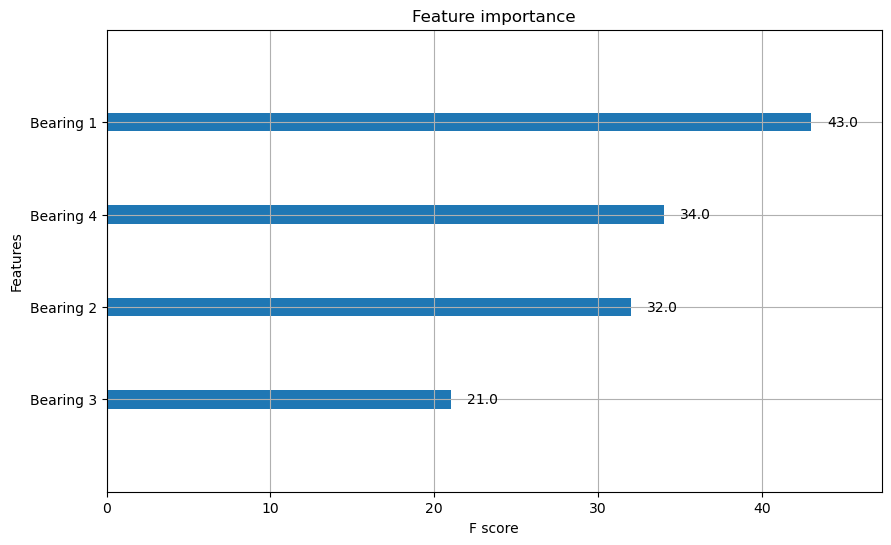

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(xgb_opt_model, ax=ax)

==> XGBoost 모델이 데이터의 이상치 여부를 분류하는데 변수 Bearing1이 가장 큰 영향을 미침
<br>

----

# __<br>2-2. LightGBM__

In [15]:
from lightgbm import LGBMClassifier, plot_importance

- LGBMClassifier 설명
    - boosting_type: ‘gbdt’-traditional Gradient Boosting Decision Tree. ‘dart’-Dropouts meet Multiple Additive Regression Trees. ‘goss’-Gradient-based One-Side Sampling. ‘rf’-Random Forest. 디폴트 ‘gbdt’.
    - learning_rate: 디폴트 0.1
    - max_depth: 각 의사결정나무의 최대 깊이. 디폴트 -1 (no limit)
    - n_estimators: 모형 개수. 디폴트 100
    - objective: objective function. ‘regression’ for LGBMRegressor, ‘binary’ or ‘multiclass’ for LGBMClassifier, ‘lambdarank’ for LGBMRanker. 디폴트 None

### Step 1. 모델 선언 및 학습

In [16]:
lgb_model = LGBMClassifier(objective='binary', random_state=42)
lgb_model.fit(X_train, y_train)

LGBMClassifier(objective='binary', random_state=42)

### Step 2. 예측 및 모델 평가

In [17]:
lgb_y_pred = lgb_model.predict(X_test)
lgb_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
# 테스트 데이터에 대한 성능 평가 
lgb_f1 = f1_score(y_true=y_test, y_pred=lgb_y_pred)
lgb_f1

0.9846153846153847

==> LightGBM 모델이 base 모델보다 향상된 성능을 도출함
<br><br>

### Step 3. Hyperparameter 탐색

In [19]:
# Hyperparameters 후보 설정
lgb_param_grid = {'learning_rate': [1, 0.1, 0.01],
                  'n_estimators': [50, 100, 150]
                 }

In [20]:
# Hyperparameter 탐색 진행
lgb_model = LGBMClassifier(random_state=42)

lgb_grid_search = GridSearchCV(lgb_model, param_grid=lgb_param_grid, cv=10, scoring='f1')
lgb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LGBMClassifier(random_state=42),
             param_grid={'learning_rate': [1, 0.1, 0.01],
                         'n_estimators': [50, 100, 150]},
             scoring='f1')

In [21]:
# 최적 hyperparameter 확인 및 최적 모델 구축
lgb_grid_search.best_params_

{'learning_rate': 1, 'n_estimators': 50}

In [22]:
lgb_opt_model = lgb_grid_search.best_estimator_
lgb_opt_model

LGBMClassifier(learning_rate=1, n_estimators=50, random_state=42)

### Step 4. 예측 및 모델 평가

In [23]:
lgb_opt_y_pred = lgb_opt_model.predict(X_test)
lgb_opt_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
# 테스트 데이터에 대한 성능 평가 
lgb_opt_f1 = f1_score(y_true=y_test, y_pred=lgb_opt_y_pred)
lgb_opt_f1

0.9746192893401016

### Step 5. 변수 중요도 확인

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

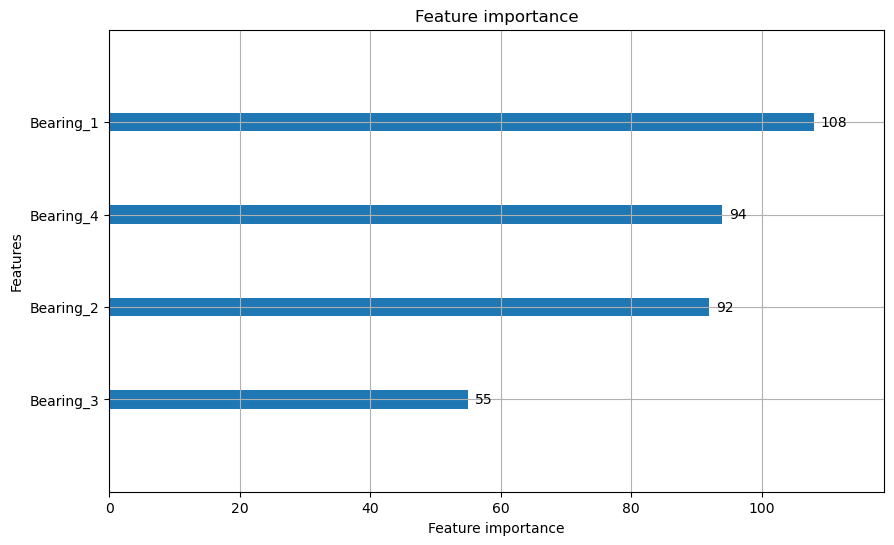

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(lgb_opt_model, ax=ax)

==> LightGBM 모델이 이상치 여부를 분류하는데 변수 Bearing1이 가장 큰 영향을 미침
<br>

---

# __<br>2-3. CatBoost__

In [26]:
from catboost import CatBoostClassifier

- CatBoostClassifier 설명
    - iterations: 의사결정나무 개수. 디폴트 1000
    - learning_rate: 디폴트 0.3
    - depth: 각 의사결정나무의 최대 깊이. 디폴트 6

### Step 1. 모델 선언 및 학습

In [27]:
cb_model = CatBoostClassifier(iterations=50, random_state=42, silent=True)
cb_model.fit(X_train, y_train)

### Step 2. 예측 및 모델 평가

In [28]:
cb_y_pred = cb_model.predict(X_test)
cb_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
# 테스트 데이터에 대한 성능 평가 
cb_f1 = f1_score(y_true= y_test, y_pred= cb_y_pred)
cb_f1

0.9846153846153847

==> CatBoost 모델이 base 모델보다 향상된 성능을 도출함
<br><br>

### Step 3. Hyperparameter 탐색

In [30]:
# Hyperparameters 후보 설정
cb_param_grid = {'depth': [3, 6, 9],
                 'iterations': [50, 100, 150]
                }

In [31]:
# Hyperparameter 탐색 진행
cb_model = CatBoostClassifier(random_state=42)

cb_grid_search = GridSearchCV(cb_model, param_grid=cb_param_grid, cv=10, scoring='f1')
cb_grid_search.fit(X_train, y_train)

Learning rate set to 0.130927
0:	learn: 0.5841210	total: 456us	remaining: 22.4ms
1:	learn: 0.4959806	total: 772us	remaining: 18.5ms
2:	learn: 0.4272467	total: 1.08ms	remaining: 16.9ms
3:	learn: 0.3704301	total: 1.38ms	remaining: 15.9ms
4:	learn: 0.3236816	total: 1.68ms	remaining: 15.1ms
5:	learn: 0.2828907	total: 1.98ms	remaining: 14.5ms
6:	learn: 0.2510422	total: 2.27ms	remaining: 14ms
7:	learn: 0.2214815	total: 2.58ms	remaining: 13.5ms
8:	learn: 0.1977595	total: 2.88ms	remaining: 13.1ms
9:	learn: 0.1750266	total: 3.1ms	remaining: 12.4ms
10:	learn: 0.1560932	total: 3.37ms	remaining: 12ms
11:	learn: 0.1397934	total: 3.67ms	remaining: 11.6ms
12:	learn: 0.1269759	total: 3.97ms	remaining: 11.3ms
13:	learn: 0.1144416	total: 4.26ms	remaining: 11ms
14:	learn: 0.1029060	total: 4.58ms	remaining: 10.7ms
15:	learn: 0.0934464	total: 5.02ms	remaining: 10.7ms
16:	learn: 0.0854342	total: 5.27ms	remaining: 10.2ms
17:	learn: 0.0773836	total: 5.54ms	remaining: 9.85ms
18:	learn: 0.0704880	total: 5.91ms	

3:	learn: 0.3859695	total: 1.09ms	remaining: 12.5ms
4:	learn: 0.3406892	total: 1.48ms	remaining: 13.3ms
5:	learn: 0.3013402	total: 1.63ms	remaining: 12ms
6:	learn: 0.2694645	total: 1.83ms	remaining: 11.2ms
7:	learn: 0.2432932	total: 2.08ms	remaining: 10.9ms
8:	learn: 0.2220562	total: 2.35ms	remaining: 10.7ms
9:	learn: 0.2023323	total: 2.51ms	remaining: 10ms
10:	learn: 0.1834528	total: 2.65ms	remaining: 9.41ms
11:	learn: 0.1666859	total: 2.86ms	remaining: 9.06ms
12:	learn: 0.1530499	total: 3.13ms	remaining: 8.91ms
13:	learn: 0.1412368	total: 3.27ms	remaining: 8.42ms
14:	learn: 0.1295993	total: 3.66ms	remaining: 8.54ms
15:	learn: 0.1204108	total: 3.84ms	remaining: 8.16ms
16:	learn: 0.1127702	total: 3.99ms	remaining: 7.74ms
17:	learn: 0.1050700	total: 4.26ms	remaining: 7.57ms
18:	learn: 0.0983419	total: 4.4ms	remaining: 7.18ms
19:	learn: 0.0920999	total: 4.65ms	remaining: 6.98ms
20:	learn: 0.0878687	total: 4.81ms	remaining: 6.64ms
21:	learn: 0.0826858	total: 5.07ms	remaining: 6.46ms
22:	l

85:	learn: 0.0473769	total: 15.7ms	remaining: 2.56ms
86:	learn: 0.0472199	total: 16.2ms	remaining: 2.42ms
87:	learn: 0.0471072	total: 16.6ms	remaining: 2.26ms
88:	learn: 0.0467964	total: 16.8ms	remaining: 2.08ms
89:	learn: 0.0461418	total: 17.1ms	remaining: 1.9ms
90:	learn: 0.0455434	total: 17.4ms	remaining: 1.72ms
91:	learn: 0.0454485	total: 18.4ms	remaining: 1.6ms
92:	learn: 0.0453916	total: 18.7ms	remaining: 1.41ms
93:	learn: 0.0453364	total: 19ms	remaining: 1.21ms
94:	learn: 0.0452215	total: 19.3ms	remaining: 1.01ms
95:	learn: 0.0451390	total: 19.6ms	remaining: 816us
96:	learn: 0.0450864	total: 19.8ms	remaining: 611us
97:	learn: 0.0447040	total: 20.1ms	remaining: 411us
98:	learn: 0.0446324	total: 20.4ms	remaining: 206us
99:	learn: 0.0442335	total: 20.8ms	remaining: 0us
Learning rate set to 0.06934
0:	learn: 0.6370702	total: 215us	remaining: 21.3ms
1:	learn: 0.5873225	total: 595us	remaining: 29.2ms
2:	learn: 0.5434858	total: 802us	remaining: 26ms
3:	learn: 0.5035150	total: 998us	rem

7:	learn: 0.4396295	total: 3.01ms	remaining: 53.5ms
8:	learn: 0.4179411	total: 3.33ms	remaining: 52.1ms
9:	learn: 0.3961223	total: 3.58ms	remaining: 50.2ms
10:	learn: 0.3759825	total: 4.34ms	remaining: 54.8ms
11:	learn: 0.3575698	total: 4.51ms	remaining: 51.8ms
12:	learn: 0.3408018	total: 5.18ms	remaining: 54.5ms
13:	learn: 0.3251369	total: 5.29ms	remaining: 51.4ms
14:	learn: 0.3094862	total: 5.42ms	remaining: 48.8ms
15:	learn: 0.2956876	total: 5.55ms	remaining: 46.5ms
16:	learn: 0.2819789	total: 5.68ms	remaining: 44.4ms
17:	learn: 0.2691324	total: 5.82ms	remaining: 42.6ms
18:	learn: 0.2573004	total: 5.96ms	remaining: 41.1ms
19:	learn: 0.2456512	total: 6.1ms	remaining: 39.7ms
20:	learn: 0.2350602	total: 6.47ms	remaining: 39.8ms
21:	learn: 0.2250239	total: 6.68ms	remaining: 38.9ms
22:	learn: 0.2151884	total: 6.86ms	remaining: 37.9ms
23:	learn: 0.2064333	total: 6.98ms	remaining: 36.6ms
24:	learn: 0.1980382	total: 7.11ms	remaining: 35.6ms
25:	learn: 0.1900514	total: 17.4ms	remaining: 82.8

89:	learn: 0.0519984	total: 19.4ms	remaining: 12.9ms
90:	learn: 0.0513586	total: 19.8ms	remaining: 12.8ms
91:	learn: 0.0512315	total: 20.1ms	remaining: 12.7ms
92:	learn: 0.0511446	total: 20.5ms	remaining: 12.6ms
93:	learn: 0.0510604	total: 20.8ms	remaining: 12.4ms
94:	learn: 0.0509415	total: 21ms	remaining: 12.2ms
95:	learn: 0.0508222	total: 21.2ms	remaining: 11.9ms
96:	learn: 0.0507402	total: 21.4ms	remaining: 11.7ms
97:	learn: 0.0503118	total: 21.6ms	remaining: 11.4ms
98:	learn: 0.0501587	total: 21.9ms	remaining: 11.3ms
99:	learn: 0.0496769	total: 22.8ms	remaining: 11.4ms
100:	learn: 0.0496084	total: 23.3ms	remaining: 11.3ms
101:	learn: 0.0492763	total: 23.6ms	remaining: 11.1ms
102:	learn: 0.0486983	total: 23.8ms	remaining: 10.9ms
103:	learn: 0.0486307	total: 24ms	remaining: 10.6ms
104:	learn: 0.0485488	total: 24.4ms	remaining: 10.5ms
105:	learn: 0.0479975	total: 24.6ms	remaining: 10.2ms
106:	learn: 0.0475027	total: 25ms	remaining: 10ms
107:	learn: 0.0471836	total: 25.4ms	remaining: 

96:	learn: 0.0551294	total: 21.1ms	remaining: 11.5ms
97:	learn: 0.0546022	total: 21.3ms	remaining: 11.3ms
98:	learn: 0.0544741	total: 21.5ms	remaining: 11.1ms
99:	learn: 0.0539096	total: 21.6ms	remaining: 10.8ms
100:	learn: 0.0538391	total: 21.7ms	remaining: 10.5ms
101:	learn: 0.0534982	total: 21.9ms	remaining: 10.3ms
102:	learn: 0.0528877	total: 22ms	remaining: 10ms
103:	learn: 0.0527934	total: 22.1ms	remaining: 9.79ms
104:	learn: 0.0527121	total: 22.3ms	remaining: 9.55ms
105:	learn: 0.0521295	total: 22.4ms	remaining: 9.3ms
106:	learn: 0.0516086	total: 22.5ms	remaining: 9.06ms
107:	learn: 0.0514963	total: 22.7ms	remaining: 8.81ms
108:	learn: 0.0514320	total: 22.8ms	remaining: 8.57ms
109:	learn: 0.0510808	total: 22.9ms	remaining: 8.34ms
110:	learn: 0.0509410	total: 23.1ms	remaining: 8.1ms
111:	learn: 0.0508691	total: 23.2ms	remaining: 7.87ms
112:	learn: 0.0503480	total: 23.3ms	remaining: 7.63ms
113:	learn: 0.0500790	total: 23.4ms	remaining: 7.4ms
114:	learn: 0.0499520	total: 23.6ms	rem

Learning rate set to 0.130927
0:	learn: 0.5963395	total: 917us	remaining: 44.9ms
1:	learn: 0.5139055	total: 1.24ms	remaining: 29.7ms
2:	learn: 0.4482747	total: 1.51ms	remaining: 23.7ms
3:	learn: 0.3930513	total: 1.81ms	remaining: 20.8ms
4:	learn: 0.3507909	total: 2.08ms	remaining: 18.7ms
5:	learn: 0.3128250	total: 2.35ms	remaining: 17.3ms
6:	learn: 0.2823254	total: 2.64ms	remaining: 16.2ms
7:	learn: 0.2507495	total: 2.78ms	remaining: 14.6ms
8:	learn: 0.2263659	total: 3.06ms	remaining: 13.9ms
9:	learn: 0.2052595	total: 3.47ms	remaining: 13.9ms
10:	learn: 0.1895057	total: 4.54ms	remaining: 16.1ms
11:	learn: 0.1737889	total: 4.98ms	remaining: 15.8ms
12:	learn: 0.1593681	total: 5.41ms	remaining: 15.4ms
13:	learn: 0.1479261	total: 5.91ms	remaining: 15.2ms
14:	learn: 0.1382266	total: 6.34ms	remaining: 14.8ms
15:	learn: 0.1271911	total: 6.67ms	remaining: 14.2ms
16:	learn: 0.1187445	total: 7ms	remaining: 13.6ms
17:	learn: 0.1099234	total: 7.37ms	remaining: 13.1ms
18:	learn: 0.1020252	total: 7.

7:	learn: 0.2508659	total: 3.59ms	remaining: 18.9ms
8:	learn: 0.2263010	total: 4.09ms	remaining: 18.6ms
9:	learn: 0.2051843	total: 4.5ms	remaining: 18ms
10:	learn: 0.1858892	total: 4.92ms	remaining: 17.4ms
11:	learn: 0.1704779	total: 5.27ms	remaining: 16.7ms
12:	learn: 0.1562784	total: 5.62ms	remaining: 16ms
13:	learn: 0.1447008	total: 5.99ms	remaining: 15.4ms
14:	learn: 0.1348280	total: 6.4ms	remaining: 14.9ms
15:	learn: 0.1245956	total: 6.77ms	remaining: 14.4ms
16:	learn: 0.1155745	total: 7.55ms	remaining: 14.7ms
17:	learn: 0.1070650	total: 7.92ms	remaining: 14.1ms
18:	learn: 0.0996975	total: 8.26ms	remaining: 13.5ms
19:	learn: 0.0931272	total: 8.64ms	remaining: 13ms
20:	learn: 0.0874516	total: 9ms	remaining: 12.4ms
21:	learn: 0.0818634	total: 9.53ms	remaining: 12.1ms
22:	learn: 0.0766548	total: 10.1ms	remaining: 11.9ms
23:	learn: 0.0718411	total: 10.5ms	remaining: 11.4ms
24:	learn: 0.0676576	total: 10.9ms	remaining: 10.9ms
25:	learn: 0.0640914	total: 11.3ms	remaining: 10.5ms
26:	lea

11:	learn: 0.3021486	total: 8.18ms	remaining: 60ms
12:	learn: 0.2853289	total: 8.83ms	remaining: 59.1ms
13:	learn: 0.2713795	total: 18.6ms	remaining: 115ms
14:	learn: 0.2580868	total: 19.3ms	remaining: 109ms
15:	learn: 0.2450995	total: 19.9ms	remaining: 105ms
16:	learn: 0.2331362	total: 20.6ms	remaining: 101ms
17:	learn: 0.2206261	total: 21.3ms	remaining: 96.8ms
18:	learn: 0.2099114	total: 21.9ms	remaining: 93.4ms
19:	learn: 0.2004833	total: 22.7ms	remaining: 90.8ms
20:	learn: 0.1912125	total: 23.3ms	remaining: 87.7ms
21:	learn: 0.1821990	total: 24.3ms	remaining: 86.1ms
22:	learn: 0.1738501	total: 24.8ms	remaining: 83ms
23:	learn: 0.1674507	total: 25.3ms	remaining: 80.2ms
24:	learn: 0.1605054	total: 26ms	remaining: 78.1ms
25:	learn: 0.1534474	total: 26.6ms	remaining: 75.6ms
26:	learn: 0.1468557	total: 27.2ms	remaining: 73.6ms
27:	learn: 0.1408343	total: 28ms	remaining: 72.1ms
28:	learn: 0.1356638	total: 28.8ms	remaining: 70.6ms
29:	learn: 0.1306378	total: 29.3ms	remaining: 68.4ms
30:	l

71:	learn: 0.0415811	total: 38.8ms	remaining: 15.1ms
72:	learn: 0.0411500	total: 39.4ms	remaining: 14.6ms
73:	learn: 0.0404928	total: 40ms	remaining: 14.1ms
74:	learn: 0.0399967	total: 40.5ms	remaining: 13.5ms
75:	learn: 0.0395444	total: 41.3ms	remaining: 13.1ms
76:	learn: 0.0390071	total: 41.9ms	remaining: 12.5ms
77:	learn: 0.0385488	total: 42.7ms	remaining: 12.1ms
78:	learn: 0.0382184	total: 43.4ms	remaining: 11.5ms
79:	learn: 0.0377346	total: 44.1ms	remaining: 11ms
80:	learn: 0.0376151	total: 44.9ms	remaining: 10.5ms
81:	learn: 0.0370479	total: 45.6ms	remaining: 10ms
82:	learn: 0.0366767	total: 46.2ms	remaining: 9.47ms
83:	learn: 0.0361658	total: 46.9ms	remaining: 8.93ms
84:	learn: 0.0358800	total: 47.4ms	remaining: 8.37ms
85:	learn: 0.0354647	total: 48.2ms	remaining: 7.84ms
86:	learn: 0.0348751	total: 49ms	remaining: 7.32ms
87:	learn: 0.0345072	total: 50.4ms	remaining: 6.87ms
88:	learn: 0.0340309	total: 51ms	remaining: 6.31ms
89:	learn: 0.0338708	total: 51.7ms	remaining: 5.74ms
90:

83:	learn: 0.0363657	total: 96ms	remaining: 18.3ms
84:	learn: 0.0356897	total: 96.9ms	remaining: 17.1ms
85:	learn: 0.0351793	total: 97.5ms	remaining: 15.9ms
86:	learn: 0.0345794	total: 98.2ms	remaining: 14.7ms
87:	learn: 0.0343846	total: 98.7ms	remaining: 13.5ms
88:	learn: 0.0340652	total: 99.2ms	remaining: 12.3ms
89:	learn: 0.0339183	total: 105ms	remaining: 11.6ms
90:	learn: 0.0336278	total: 107ms	remaining: 10.6ms
91:	learn: 0.0333918	total: 107ms	remaining: 9.33ms
92:	learn: 0.0328893	total: 108ms	remaining: 8.13ms
93:	learn: 0.0325086	total: 109ms	remaining: 6.94ms
94:	learn: 0.0322426	total: 109ms	remaining: 5.76ms
95:	learn: 0.0319585	total: 110ms	remaining: 4.59ms
96:	learn: 0.0316905	total: 111ms	remaining: 3.44ms
97:	learn: 0.0314571	total: 112ms	remaining: 2.28ms
98:	learn: 0.0311579	total: 117ms	remaining: 1.19ms
99:	learn: 0.0307294	total: 118ms	remaining: 0us
Learning rate set to 0.06934
0:	learn: 0.6405017	total: 499us	remaining: 49.5ms
1:	learn: 0.5908501	total: 859us	re

2:	learn: 0.5488080	total: 2.35ms	remaining: 76.1ms
3:	learn: 0.5087509	total: 2.93ms	remaining: 70.3ms
4:	learn: 0.4740578	total: 3.45ms	remaining: 65.6ms
5:	learn: 0.4416707	total: 4.06ms	remaining: 63.6ms
6:	learn: 0.4149296	total: 4.44ms	remaining: 59ms
7:	learn: 0.3860324	total: 4.7ms	remaining: 54ms
8:	learn: 0.3627213	total: 5.07ms	remaining: 51.3ms
9:	learn: 0.3413431	total: 5.41ms	remaining: 48.7ms
10:	learn: 0.3207683	total: 5.69ms	remaining: 46.1ms
11:	learn: 0.3013946	total: 5.96ms	remaining: 43.7ms
12:	learn: 0.2842959	total: 6.32ms	remaining: 42.3ms
13:	learn: 0.2684827	total: 6.68ms	remaining: 41ms
14:	learn: 0.2551476	total: 7.03ms	remaining: 39.9ms
15:	learn: 0.2424140	total: 7.42ms	remaining: 39ms
16:	learn: 0.2303201	total: 7.86ms	remaining: 38.4ms
17:	learn: 0.2176000	total: 8.23ms	remaining: 37.5ms
18:	learn: 0.2064225	total: 8.64ms	remaining: 36.8ms
19:	learn: 0.1963601	total: 9.08ms	remaining: 36.3ms
20:	learn: 0.1872994	total: 9.47ms	remaining: 35.6ms
21:	learn:

69:	learn: 0.0227887	total: 97.1ms	remaining: 41.6ms
70:	learn: 0.0222007	total: 97.7ms	remaining: 39.9ms
71:	learn: 0.0216519	total: 98ms	remaining: 38.1ms
72:	learn: 0.0211802	total: 98.7ms	remaining: 36.5ms
73:	learn: 0.0206384	total: 99.4ms	remaining: 34.9ms
74:	learn: 0.0200551	total: 100ms	remaining: 33.4ms
75:	learn: 0.0195218	total: 101ms	remaining: 31.8ms
76:	learn: 0.0190675	total: 101ms	remaining: 30.3ms
77:	learn: 0.0186996	total: 102ms	remaining: 28.8ms
78:	learn: 0.0183763	total: 103ms	remaining: 27.3ms
79:	learn: 0.0180000	total: 104ms	remaining: 25.9ms
80:	learn: 0.0175641	total: 104ms	remaining: 24.4ms
81:	learn: 0.0170903	total: 105ms	remaining: 23ms
82:	learn: 0.0166897	total: 105ms	remaining: 21.6ms
83:	learn: 0.0163705	total: 106ms	remaining: 20.2ms
84:	learn: 0.0158893	total: 107ms	remaining: 18.8ms
85:	learn: 0.0155050	total: 127ms	remaining: 20.7ms
86:	learn: 0.0151882	total: 127ms	remaining: 19ms
87:	learn: 0.0148304	total: 128ms	remaining: 17.4ms
88:	learn: 0.

126:	learn: 0.0153634	total: 135ms	remaining: 24.5ms
127:	learn: 0.0151968	total: 136ms	remaining: 23.4ms
128:	learn: 0.0150089	total: 137ms	remaining: 22.3ms
129:	learn: 0.0147813	total: 137ms	remaining: 21.1ms
130:	learn: 0.0145819	total: 138ms	remaining: 20ms
131:	learn: 0.0143491	total: 139ms	remaining: 18.9ms
132:	learn: 0.0141875	total: 139ms	remaining: 17.8ms
133:	learn: 0.0140000	total: 140ms	remaining: 16.7ms
134:	learn: 0.0137741	total: 140ms	remaining: 15.6ms
135:	learn: 0.0135827	total: 141ms	remaining: 14.5ms
136:	learn: 0.0133943	total: 141ms	remaining: 13.4ms
137:	learn: 0.0132734	total: 142ms	remaining: 12.4ms
138:	learn: 0.0132188	total: 143ms	remaining: 11.3ms
139:	learn: 0.0130630	total: 143ms	remaining: 10.2ms
140:	learn: 0.0130311	total: 144ms	remaining: 9.19ms
141:	learn: 0.0128174	total: 144ms	remaining: 8.14ms
142:	learn: 0.0127065	total: 145ms	remaining: 7.11ms
143:	learn: 0.0125477	total: 147ms	remaining: 6.11ms
144:	learn: 0.0124043	total: 148ms	remaining: 5.

77:	learn: 0.0593235	total: 66.4ms	remaining: 61.3ms
78:	learn: 0.0583043	total: 67.2ms	remaining: 60.4ms
79:	learn: 0.0575105	total: 67.9ms	remaining: 59.4ms
80:	learn: 0.0565717	total: 68.5ms	remaining: 58.4ms
81:	learn: 0.0555367	total: 69.2ms	remaining: 57.4ms
82:	learn: 0.0546504	total: 69.8ms	remaining: 56.4ms
83:	learn: 0.0538790	total: 70.5ms	remaining: 55.4ms
84:	learn: 0.0530618	total: 71.1ms	remaining: 54.4ms
85:	learn: 0.0523010	total: 71.7ms	remaining: 53.4ms
86:	learn: 0.0514621	total: 72.3ms	remaining: 52.4ms
87:	learn: 0.0508076	total: 73ms	remaining: 51.4ms
88:	learn: 0.0500491	total: 73.4ms	remaining: 50.3ms
89:	learn: 0.0493397	total: 74.1ms	remaining: 49.4ms
90:	learn: 0.0487172	total: 75.4ms	remaining: 48.9ms
91:	learn: 0.0481074	total: 76.1ms	remaining: 48ms
92:	learn: 0.0476006	total: 76.7ms	remaining: 47ms
93:	learn: 0.0469911	total: 77.3ms	remaining: 46ms
94:	learn: 0.0463444	total: 78ms	remaining: 45.1ms
95:	learn: 0.0455677	total: 78.6ms	remaining: 44.2ms
96:

147:	learn: 0.0290637	total: 98.7ms	remaining: 1.33ms
148:	learn: 0.0287739	total: 99.5ms	remaining: 667us
149:	learn: 0.0286039	total: 100ms	remaining: 0us
Learning rate set to 0.047809
0:	learn: 0.6564990	total: 1.29ms	remaining: 192ms
1:	learn: 0.6205908	total: 1.65ms	remaining: 122ms
2:	learn: 0.5888477	total: 2.2ms	remaining: 108ms
3:	learn: 0.5581047	total: 2.6ms	remaining: 94.8ms
4:	learn: 0.5307349	total: 3.04ms	remaining: 88.1ms
5:	learn: 0.5051847	total: 3.43ms	remaining: 82.3ms
6:	learn: 0.4824989	total: 3.88ms	remaining: 79.2ms
7:	learn: 0.4576820	total: 4.09ms	remaining: 72.7ms
8:	learn: 0.4361091	total: 4.49ms	remaining: 70.3ms
9:	learn: 0.4167618	total: 4.92ms	remaining: 69ms
10:	learn: 0.3979231	total: 5.39ms	remaining: 68.1ms
11:	learn: 0.3803850	total: 5.82ms	remaining: 66.9ms
12:	learn: 0.3641905	total: 6.18ms	remaining: 65.2ms
13:	learn: 0.3498571	total: 6.58ms	remaining: 63.9ms
14:	learn: 0.3366526	total: 6.93ms	remaining: 62.4ms
15:	learn: 0.3230721	total: 7.32ms	

64:	learn: 0.0754337	total: 36.9ms	remaining: 48.3ms
65:	learn: 0.0740478	total: 37.7ms	remaining: 48ms
66:	learn: 0.0723638	total: 38.4ms	remaining: 47.6ms
67:	learn: 0.0711549	total: 39.1ms	remaining: 47.2ms
68:	learn: 0.0699831	total: 39.8ms	remaining: 46.8ms
69:	learn: 0.0684476	total: 40.4ms	remaining: 46.2ms
70:	learn: 0.0669094	total: 41ms	remaining: 45.6ms
71:	learn: 0.0657583	total: 41.6ms	remaining: 45.1ms
72:	learn: 0.0647151	total: 42.1ms	remaining: 44.4ms
73:	learn: 0.0636146	total: 42.9ms	remaining: 44ms
74:	learn: 0.0623407	total: 43.6ms	remaining: 43.6ms
75:	learn: 0.0609766	total: 44.1ms	remaining: 43ms
76:	learn: 0.0597518	total: 44.8ms	remaining: 42.5ms
77:	learn: 0.0589266	total: 45.5ms	remaining: 42ms
78:	learn: 0.0577403	total: 46.1ms	remaining: 41.4ms
79:	learn: 0.0569381	total: 51.2ms	remaining: 44.8ms
80:	learn: 0.0561648	total: 51.8ms	remaining: 44.2ms
81:	learn: 0.0553879	total: 52.4ms	remaining: 43.5ms
82:	learn: 0.0545446	total: 53.3ms	remaining: 43ms
83:	l

23:	learn: 0.2401831	total: 20.8ms	remaining: 109ms
24:	learn: 0.2331529	total: 21.3ms	remaining: 107ms
25:	learn: 0.2247562	total: 22ms	remaining: 105ms
26:	learn: 0.2168851	total: 22.5ms	remaining: 102ms
27:	learn: 0.2103290	total: 23ms	remaining: 100ms
28:	learn: 0.2031617	total: 23.6ms	remaining: 98.5ms
29:	learn: 0.1966433	total: 24.2ms	remaining: 96.7ms
30:	learn: 0.1902568	total: 24.8ms	remaining: 95.4ms
31:	learn: 0.1844779	total: 25.6ms	remaining: 94.2ms
32:	learn: 0.1784767	total: 26.2ms	remaining: 92.9ms
33:	learn: 0.1728057	total: 26.8ms	remaining: 91.5ms
34:	learn: 0.1675631	total: 27.4ms	remaining: 89.9ms
35:	learn: 0.1617717	total: 27.9ms	remaining: 88.4ms
36:	learn: 0.1572064	total: 29.2ms	remaining: 89.2ms
37:	learn: 0.1525741	total: 29.8ms	remaining: 87.7ms
38:	learn: 0.1478852	total: 30.4ms	remaining: 86.5ms
39:	learn: 0.1434497	total: 31.2ms	remaining: 85.8ms
40:	learn: 0.1393550	total: 31.9ms	remaining: 84.7ms
41:	learn: 0.1350246	total: 32.3ms	remaining: 83.1ms
42

132:	learn: 0.0146951	total: 107ms	remaining: 13.7ms
133:	learn: 0.0144741	total: 108ms	remaining: 12.9ms
134:	learn: 0.0143070	total: 110ms	remaining: 12.3ms
135:	learn: 0.0140746	total: 111ms	remaining: 11.4ms
136:	learn: 0.0139159	total: 112ms	remaining: 10.6ms
137:	learn: 0.0137400	total: 112ms	remaining: 9.75ms
138:	learn: 0.0135639	total: 113ms	remaining: 8.93ms
139:	learn: 0.0134438	total: 114ms	remaining: 8.11ms
140:	learn: 0.0132757	total: 114ms	remaining: 7.3ms
141:	learn: 0.0131319	total: 115ms	remaining: 6.48ms
142:	learn: 0.0129537	total: 116ms	remaining: 5.66ms
143:	learn: 0.0128050	total: 116ms	remaining: 4.85ms
144:	learn: 0.0126329	total: 118ms	remaining: 4.06ms
145:	learn: 0.0124911	total: 118ms	remaining: 3.24ms
146:	learn: 0.0123394	total: 119ms	remaining: 2.43ms
147:	learn: 0.0121896	total: 120ms	remaining: 1.62ms
148:	learn: 0.0120574	total: 120ms	remaining: 807us
149:	learn: 0.0119060	total: 122ms	remaining: 0us
Learning rate set to 0.130927
0:	learn: 0.5998083	t

45:	learn: 0.0379069	total: 94.3ms	remaining: 8.2ms
46:	learn: 0.0370633	total: 98ms	remaining: 6.25ms
47:	learn: 0.0357116	total: 140ms	remaining: 5.82ms
48:	learn: 0.0342250	total: 142ms	remaining: 2.89ms
49:	learn: 0.0335082	total: 144ms	remaining: 0us
Learning rate set to 0.130927
0:	learn: 0.6050353	total: 1.24ms	remaining: 60.6ms
1:	learn: 0.5354478	total: 2.5ms	remaining: 59.9ms
2:	learn: 0.4725947	total: 3.62ms	remaining: 56.7ms
3:	learn: 0.4188197	total: 4.68ms	remaining: 53.9ms
4:	learn: 0.3801478	total: 6.65ms	remaining: 59.9ms
5:	learn: 0.3405812	total: 8.01ms	remaining: 58.7ms
6:	learn: 0.3069665	total: 9.78ms	remaining: 60.1ms
7:	learn: 0.2797293	total: 11.8ms	remaining: 62ms
8:	learn: 0.2538936	total: 13.4ms	remaining: 61ms
9:	learn: 0.2378579	total: 14.9ms	remaining: 59.7ms
10:	learn: 0.2196248	total: 23.6ms	remaining: 83.6ms
11:	learn: 0.2027284	total: 25.1ms	remaining: 79.6ms
12:	learn: 0.1891134	total: 29.2ms	remaining: 83ms
13:	learn: 0.1749779	total: 32.3ms	remaini

23:	learn: 0.0925406	total: 40.4ms	remaining: 43.8ms
24:	learn: 0.0874022	total: 42.2ms	remaining: 42.2ms
25:	learn: 0.0832497	total: 45.1ms	remaining: 41.7ms
26:	learn: 0.0780269	total: 50.4ms	remaining: 42.9ms
27:	learn: 0.0749410	total: 72.4ms	remaining: 56.9ms
28:	learn: 0.0717852	total: 74ms	remaining: 53.6ms
29:	learn: 0.0677925	total: 75.4ms	remaining: 50.3ms
30:	learn: 0.0648387	total: 77.2ms	remaining: 47.3ms
31:	learn: 0.0621710	total: 78.8ms	remaining: 44.3ms
32:	learn: 0.0601946	total: 80.4ms	remaining: 41.4ms
33:	learn: 0.0582007	total: 82ms	remaining: 38.6ms
34:	learn: 0.0560655	total: 83.5ms	remaining: 35.8ms
35:	learn: 0.0543159	total: 86.7ms	remaining: 33.7ms
36:	learn: 0.0521227	total: 89.4ms	remaining: 31.4ms
37:	learn: 0.0500736	total: 91.1ms	remaining: 28.8ms
38:	learn: 0.0486142	total: 92.8ms	remaining: 26.2ms
39:	learn: 0.0472574	total: 94.5ms	remaining: 23.6ms
40:	learn: 0.0451255	total: 96ms	remaining: 21.1ms
41:	learn: 0.0435221	total: 97.7ms	remaining: 18.6ms

49:	learn: 0.0614405	total: 89.6ms	remaining: 89.6ms
50:	learn: 0.0596907	total: 91.3ms	remaining: 87.7ms
51:	learn: 0.0575444	total: 94ms	remaining: 86.8ms
52:	learn: 0.0559977	total: 95.7ms	remaining: 84.9ms
53:	learn: 0.0545188	total: 97.3ms	remaining: 82.9ms
54:	learn: 0.0529006	total: 98.7ms	remaining: 80.8ms
55:	learn: 0.0510170	total: 101ms	remaining: 79.1ms
56:	learn: 0.0492304	total: 102ms	remaining: 77.2ms
57:	learn: 0.0476902	total: 104ms	remaining: 75.2ms
58:	learn: 0.0464238	total: 106ms	remaining: 73.3ms
59:	learn: 0.0450701	total: 107ms	remaining: 71.4ms
60:	learn: 0.0436786	total: 109ms	remaining: 69.5ms
61:	learn: 0.0424298	total: 110ms	remaining: 67.7ms
62:	learn: 0.0413110	total: 112ms	remaining: 65.8ms
63:	learn: 0.0402145	total: 113ms	remaining: 63.8ms
64:	learn: 0.0390565	total: 115ms	remaining: 62.2ms
65:	learn: 0.0380820	total: 117ms	remaining: 60.4ms
66:	learn: 0.0371282	total: 119ms	remaining: 58.5ms
67:	learn: 0.0361514	total: 120ms	remaining: 56.7ms
68:	lear

27:	learn: 0.1618808	total: 56.9ms	remaining: 146ms
28:	learn: 0.1561755	total: 58.7ms	remaining: 144ms
29:	learn: 0.1499885	total: 60.5ms	remaining: 141ms
30:	learn: 0.1451951	total: 62.2ms	remaining: 138ms
31:	learn: 0.1402718	total: 64ms	remaining: 136ms
32:	learn: 0.1354691	total: 65.7ms	remaining: 133ms
33:	learn: 0.1308874	total: 67.4ms	remaining: 131ms
34:	learn: 0.1266421	total: 69.1ms	remaining: 128ms
35:	learn: 0.1227605	total: 70.8ms	remaining: 126ms
36:	learn: 0.1188898	total: 72.4ms	remaining: 123ms
37:	learn: 0.1146587	total: 73.9ms	remaining: 121ms
38:	learn: 0.1107358	total: 75.6ms	remaining: 118ms
39:	learn: 0.1073880	total: 77.2ms	remaining: 116ms
40:	learn: 0.1035926	total: 78.9ms	remaining: 114ms
41:	learn: 0.1004592	total: 80.5ms	remaining: 111ms
42:	learn: 0.0975337	total: 82.1ms	remaining: 109ms
43:	learn: 0.0951517	total: 83.7ms	remaining: 106ms
44:	learn: 0.0924451	total: 85.2ms	remaining: 104ms
45:	learn: 0.0899522	total: 86.8ms	remaining: 102ms
46:	learn: 0.0

19:	learn: 0.2241385	total: 49.4ms	remaining: 197ms
20:	learn: 0.2151108	total: 51.6ms	remaining: 194ms
21:	learn: 0.2071289	total: 55.4ms	remaining: 197ms
22:	learn: 0.1991622	total: 57ms	remaining: 191ms
23:	learn: 0.1906002	total: 58.5ms	remaining: 185ms
24:	learn: 0.1821834	total: 60.2ms	remaining: 180ms
25:	learn: 0.1747664	total: 61.7ms	remaining: 176ms
26:	learn: 0.1667739	total: 64.4ms	remaining: 174ms
27:	learn: 0.1607307	total: 66.2ms	remaining: 170ms
28:	learn: 0.1548408	total: 67.7ms	remaining: 166ms
29:	learn: 0.1488994	total: 70.2ms	remaining: 164ms
30:	learn: 0.1441750	total: 72ms	remaining: 160ms
31:	learn: 0.1394786	total: 73.6ms	remaining: 156ms
32:	learn: 0.1349917	total: 75.2ms	remaining: 153ms
33:	learn: 0.1298742	total: 77.4ms	remaining: 150ms
34:	learn: 0.1258082	total: 78.5ms	remaining: 146ms
35:	learn: 0.1219795	total: 82ms	remaining: 146ms
36:	learn: 0.1181668	total: 85.6ms	remaining: 146ms
37:	learn: 0.1142778	total: 88.3ms	remaining: 144ms
38:	learn: 0.11087

Learning rate set to 0.06934
0:	learn: 0.6447091	total: 2.38ms	remaining: 236ms
1:	learn: 0.6034176	total: 4.16ms	remaining: 204ms
2:	learn: 0.5628009	total: 5.57ms	remaining: 180ms
3:	learn: 0.5273925	total: 6.97ms	remaining: 167ms
4:	learn: 0.5000974	total: 8.35ms	remaining: 159ms
5:	learn: 0.4677390	total: 10.3ms	remaining: 162ms
6:	learn: 0.4413007	total: 11.6ms	remaining: 154ms
7:	learn: 0.4163560	total: 13.2ms	remaining: 152ms
8:	learn: 0.3921099	total: 14.8ms	remaining: 150ms
9:	learn: 0.3736549	total: 17.6ms	remaining: 158ms
10:	learn: 0.3526004	total: 19.4ms	remaining: 157ms
11:	learn: 0.3334566	total: 21.1ms	remaining: 155ms
12:	learn: 0.3172650	total: 22.7ms	remaining: 152ms
13:	learn: 0.3006202	total: 24.3ms	remaining: 149ms
14:	learn: 0.2839315	total: 25.9ms	remaining: 147ms
15:	learn: 0.2708995	total: 27.4ms	remaining: 144ms
16:	learn: 0.2570149	total: 28.9ms	remaining: 141ms
17:	learn: 0.2461036	total: 30.6ms	remaining: 139ms
18:	learn: 0.2363924	total: 32.6ms	remaining:

1:	learn: 0.6041479	total: 2.56ms	remaining: 125ms
2:	learn: 0.5633286	total: 3.98ms	remaining: 129ms
3:	learn: 0.5247875	total: 5.15ms	remaining: 124ms
4:	learn: 0.4975141	total: 6.36ms	remaining: 121ms
5:	learn: 0.4652164	total: 7.61ms	remaining: 119ms
6:	learn: 0.4390498	total: 8.96ms	remaining: 119ms
7:	learn: 0.4142470	total: 10.2ms	remaining: 118ms
8:	learn: 0.3897009	total: 11.8ms	remaining: 119ms
9:	learn: 0.3714669	total: 13.4ms	remaining: 120ms
10:	learn: 0.3509647	total: 15.1ms	remaining: 122ms
11:	learn: 0.3320489	total: 16.7ms	remaining: 122ms
12:	learn: 0.3160780	total: 18.6ms	remaining: 124ms
13:	learn: 0.2995302	total: 20.1ms	remaining: 124ms
14:	learn: 0.2828424	total: 21.8ms	remaining: 123ms
15:	learn: 0.2694383	total: 23.4ms	remaining: 123ms
16:	learn: 0.2562790	total: 25ms	remaining: 122ms
17:	learn: 0.2454408	total: 26.8ms	remaining: 122ms
18:	learn: 0.2359177	total: 28.5ms	remaining: 122ms
19:	learn: 0.2248128	total: 30.2ms	remaining: 121ms
20:	learn: 0.2150272	to

Learning rate set to 0.047809
0:	learn: 0.6578512	total: 2.55ms	remaining: 380ms
1:	learn: 0.6252367	total: 3.86ms	remaining: 286ms
2:	learn: 0.5933404	total: 5.12ms	remaining: 251ms
3:	learn: 0.5637387	total: 6.39ms	remaining: 233ms
4:	learn: 0.5393236	total: 7.71ms	remaining: 224ms
5:	learn: 0.5122428	total: 8.92ms	remaining: 214ms
6:	learn: 0.4897950	total: 10.1ms	remaining: 207ms
7:	learn: 0.4684617	total: 11.4ms	remaining: 202ms
8:	learn: 0.4481877	total: 13ms	remaining: 203ms
9:	learn: 0.4326204	total: 14.6ms	remaining: 204ms
10:	learn: 0.4154718	total: 16.4ms	remaining: 208ms
11:	learn: 0.3973569	total: 17.9ms	remaining: 206ms
12:	learn: 0.3826500	total: 19.5ms	remaining: 205ms
13:	learn: 0.3668066	total: 20.9ms	remaining: 203ms
14:	learn: 0.3503190	total: 22.6ms	remaining: 203ms
15:	learn: 0.3368265	total: 24.3ms	remaining: 203ms
16:	learn: 0.3232632	total: 25.8ms	remaining: 202ms
17:	learn: 0.3103089	total: 27.4ms	remaining: 201ms
18:	learn: 0.3001338	total: 29ms	remaining: 20

59:	learn: 0.1030364	total: 116ms	remaining: 174ms
60:	learn: 0.1010478	total: 119ms	remaining: 174ms
61:	learn: 0.0984113	total: 122ms	remaining: 173ms
62:	learn: 0.0963077	total: 123ms	remaining: 170ms
63:	learn: 0.0946633	total: 125ms	remaining: 168ms
64:	learn: 0.0929557	total: 127ms	remaining: 166ms
65:	learn: 0.0908902	total: 128ms	remaining: 163ms
66:	learn: 0.0890776	total: 130ms	remaining: 162ms
67:	learn: 0.0869766	total: 132ms	remaining: 159ms
68:	learn: 0.0854344	total: 134ms	remaining: 157ms
69:	learn: 0.0837775	total: 135ms	remaining: 155ms
70:	learn: 0.0824680	total: 137ms	remaining: 153ms
71:	learn: 0.0809910	total: 139ms	remaining: 151ms
72:	learn: 0.0792638	total: 140ms	remaining: 148ms
73:	learn: 0.0781588	total: 142ms	remaining: 146ms
74:	learn: 0.0771791	total: 143ms	remaining: 143ms
75:	learn: 0.0754756	total: 146ms	remaining: 142ms
76:	learn: 0.0740387	total: 148ms	remaining: 140ms
77:	learn: 0.0727197	total: 149ms	remaining: 138ms
78:	learn: 0.0714280	total: 151

100:	learn: 0.0508752	total: 227ms	remaining: 110ms
101:	learn: 0.0502265	total: 237ms	remaining: 112ms
102:	learn: 0.0494948	total: 239ms	remaining: 109ms
103:	learn: 0.0488268	total: 240ms	remaining: 106ms
104:	learn: 0.0482132	total: 242ms	remaining: 104ms
105:	learn: 0.0477316	total: 243ms	remaining: 101ms
106:	learn: 0.0471842	total: 245ms	remaining: 98.5ms
107:	learn: 0.0466061	total: 247ms	remaining: 95.9ms
108:	learn: 0.0460863	total: 248ms	remaining: 93.4ms
109:	learn: 0.0456085	total: 250ms	remaining: 90.8ms
110:	learn: 0.0451494	total: 252ms	remaining: 88.7ms
111:	learn: 0.0446423	total: 254ms	remaining: 86.2ms
112:	learn: 0.0439859	total: 256ms	remaining: 83.7ms
113:	learn: 0.0432464	total: 257ms	remaining: 81.2ms
114:	learn: 0.0426917	total: 259ms	remaining: 78.7ms
115:	learn: 0.0423607	total: 260ms	remaining: 76.3ms
116:	learn: 0.0418845	total: 262ms	remaining: 73.9ms
117:	learn: 0.0414774	total: 264ms	remaining: 71.6ms
118:	learn: 0.0410139	total: 265ms	remaining: 69.1ms

133:	learn: 0.0354378	total: 280ms	remaining: 33.4ms
134:	learn: 0.0351502	total: 282ms	remaining: 31.3ms
135:	learn: 0.0346954	total: 283ms	remaining: 29.2ms
136:	learn: 0.0343558	total: 285ms	remaining: 27ms
137:	learn: 0.0338857	total: 287ms	remaining: 24.9ms
138:	learn: 0.0335113	total: 288ms	remaining: 22.8ms
139:	learn: 0.0331315	total: 290ms	remaining: 20.7ms
140:	learn: 0.0327250	total: 292ms	remaining: 18.6ms
141:	learn: 0.0323475	total: 293ms	remaining: 16.5ms
142:	learn: 0.0320201	total: 295ms	remaining: 14.4ms
143:	learn: 0.0316966	total: 296ms	remaining: 12.3ms
144:	learn: 0.0313113	total: 299ms	remaining: 10.3ms
145:	learn: 0.0309851	total: 301ms	remaining: 8.25ms
146:	learn: 0.0306359	total: 303ms	remaining: 6.17ms
147:	learn: 0.0302958	total: 307ms	remaining: 4.14ms
148:	learn: 0.0299444	total: 308ms	remaining: 2.07ms
149:	learn: 0.0297192	total: 310ms	remaining: 0us
Learning rate set to 0.047809
0:	learn: 0.6597422	total: 3.48ms	remaining: 518ms
1:	learn: 0.6298916	tot

8:	learn: 0.4619304	total: 13ms	remaining: 204ms
9:	learn: 0.4456220	total: 14.9ms	remaining: 208ms
10:	learn: 0.4268763	total: 16.7ms	remaining: 211ms
11:	learn: 0.4093226	total: 20ms	remaining: 230ms
12:	learn: 0.3942339	total: 21.7ms	remaining: 229ms
13:	learn: 0.3784674	total: 23.4ms	remaining: 227ms
14:	learn: 0.3633147	total: 25.1ms	remaining: 226ms
15:	learn: 0.3504272	total: 31.6ms	remaining: 265ms
16:	learn: 0.3374808	total: 33.2ms	remaining: 260ms
17:	learn: 0.3257849	total: 35ms	remaining: 256ms
18:	learn: 0.3155500	total: 36.6ms	remaining: 252ms
19:	learn: 0.3045493	total: 38ms	remaining: 247ms
20:	learn: 0.2944990	total: 39.6ms	remaining: 243ms
21:	learn: 0.2853149	total: 41.2ms	remaining: 239ms
22:	learn: 0.2763279	total: 42.8ms	remaining: 236ms
23:	learn: 0.2667940	total: 44.3ms	remaining: 232ms
24:	learn: 0.2578983	total: 46ms	remaining: 230ms
25:	learn: 0.2496508	total: 47.6ms	remaining: 227ms
26:	learn: 0.2413237	total: 49.3ms	remaining: 224ms
27:	learn: 0.2338604	tot

53:	learn: 0.1208541	total: 99.3ms	remaining: 176ms
54:	learn: 0.1186360	total: 101ms	remaining: 174ms
55:	learn: 0.1156620	total: 103ms	remaining: 173ms
56:	learn: 0.1125455	total: 105ms	remaining: 171ms
57:	learn: 0.1101012	total: 106ms	remaining: 169ms
58:	learn: 0.1081313	total: 108ms	remaining: 166ms
59:	learn: 0.1054672	total: 109ms	remaining: 164ms
60:	learn: 0.1031165	total: 111ms	remaining: 162ms
61:	learn: 0.1006350	total: 112ms	remaining: 159ms
62:	learn: 0.0986976	total: 114ms	remaining: 157ms
63:	learn: 0.0968050	total: 115ms	remaining: 155ms
64:	learn: 0.0948811	total: 117ms	remaining: 153ms
65:	learn: 0.0930111	total: 119ms	remaining: 151ms
66:	learn: 0.0914732	total: 120ms	remaining: 149ms
67:	learn: 0.0894753	total: 122ms	remaining: 147ms
68:	learn: 0.0878903	total: 124ms	remaining: 145ms
69:	learn: 0.0864777	total: 125ms	remaining: 143ms
70:	learn: 0.0853299	total: 127ms	remaining: 141ms
71:	learn: 0.0835854	total: 128ms	remaining: 139ms
72:	learn: 0.0817455	total: 13

87:	learn: 0.0618959	total: 197ms	remaining: 139ms
88:	learn: 0.0607136	total: 198ms	remaining: 136ms
89:	learn: 0.0598819	total: 204ms	remaining: 136ms
90:	learn: 0.0590003	total: 206ms	remaining: 133ms
91:	learn: 0.0580213	total: 207ms	remaining: 131ms
92:	learn: 0.0572747	total: 209ms	remaining: 128ms
93:	learn: 0.0564417	total: 211ms	remaining: 125ms
94:	learn: 0.0554089	total: 212ms	remaining: 123ms
95:	learn: 0.0545805	total: 214ms	remaining: 120ms
96:	learn: 0.0539461	total: 216ms	remaining: 118ms
97:	learn: 0.0532076	total: 217ms	remaining: 115ms
98:	learn: 0.0523751	total: 219ms	remaining: 113ms
99:	learn: 0.0516963	total: 221ms	remaining: 110ms
100:	learn: 0.0509593	total: 222ms	remaining: 108ms
101:	learn: 0.0502017	total: 224ms	remaining: 105ms
102:	learn: 0.0495509	total: 225ms	remaining: 103ms
103:	learn: 0.0487643	total: 227ms	remaining: 100ms
104:	learn: 0.0479850	total: 228ms	remaining: 97.9ms
105:	learn: 0.0473451	total: 230ms	remaining: 95.5ms
106:	learn: 0.0466824	t

124:	learn: 0.0373209	total: 235ms	remaining: 47.1ms
125:	learn: 0.0368203	total: 237ms	remaining: 45.2ms
126:	learn: 0.0363337	total: 240ms	remaining: 43.5ms
127:	learn: 0.0359277	total: 242ms	remaining: 41.6ms
128:	learn: 0.0355913	total: 244ms	remaining: 39.7ms
129:	learn: 0.0352894	total: 246ms	remaining: 37.8ms
130:	learn: 0.0349298	total: 249ms	remaining: 36.1ms
131:	learn: 0.0345562	total: 251ms	remaining: 34.2ms
132:	learn: 0.0340553	total: 252ms	remaining: 32.3ms
133:	learn: 0.0336745	total: 254ms	remaining: 30.4ms
134:	learn: 0.0333433	total: 256ms	remaining: 28.5ms
135:	learn: 0.0329643	total: 267ms	remaining: 27.4ms
136:	learn: 0.0326366	total: 268ms	remaining: 25.4ms
137:	learn: 0.0323067	total: 270ms	remaining: 23.5ms
138:	learn: 0.0319703	total: 271ms	remaining: 21.5ms
139:	learn: 0.0316411	total: 273ms	remaining: 19.5ms
140:	learn: 0.0312036	total: 285ms	remaining: 18.2ms
141:	learn: 0.0308419	total: 286ms	remaining: 16.1ms
142:	learn: 0.0305328	total: 288ms	remaining: 

17:	learn: 0.0927281	total: 3.46ms	remaining: 6.14ms
18:	learn: 0.0869355	total: 3.74ms	remaining: 6.1ms
19:	learn: 0.0804439	total: 3.91ms	remaining: 5.86ms
20:	learn: 0.0762929	total: 4.05ms	remaining: 5.6ms
21:	learn: 0.0713085	total: 4.2ms	remaining: 5.35ms
22:	learn: 0.0671786	total: 4.35ms	remaining: 5.1ms
23:	learn: 0.0639477	total: 4.49ms	remaining: 4.87ms
24:	learn: 0.0604498	total: 4.66ms	remaining: 4.66ms
25:	learn: 0.0581701	total: 14.9ms	remaining: 13.7ms
26:	learn: 0.0554029	total: 25.2ms	remaining: 21.4ms
27:	learn: 0.0530323	total: 25.3ms	remaining: 19.9ms
28:	learn: 0.0512966	total: 25.5ms	remaining: 18.5ms
29:	learn: 0.0499242	total: 25.6ms	remaining: 17.1ms
30:	learn: 0.0484288	total: 25.8ms	remaining: 15.8ms
31:	learn: 0.0474089	total: 26ms	remaining: 14.6ms
32:	learn: 0.0460436	total: 26.1ms	remaining: 13.5ms
33:	learn: 0.0457018	total: 26.3ms	remaining: 12.4ms
34:	learn: 0.0449584	total: 26.5ms	remaining: 11.3ms
35:	learn: 0.0445321	total: 26.6ms	remaining: 10.4ms

GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f8e811ed4c0>,
             param_grid={'depth': [3, 6, 9], 'iterations': [50, 100, 150]},
             scoring='f1')

In [32]:
# 최적 hyperparameter 확인 및 최적 모델 구축
cb_grid_search.best_params_

{'depth': 3, 'iterations': 50}

In [33]:
cb_opt_model = cb_grid_search.best_estimator_
cb_opt_model

### Step 4. 예측 및 모델 평가

In [34]:
cb_opt_y_pred = cb_opt_model.predict(X_test)
cb_opt_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [35]:
# 테스트 데이터에 대한 성능 평가 
cb_opt_f1 = f1_score(y_true=y_test, y_pred=cb_opt_y_pred)
cb_opt_f1

0.9896907216494846

### Step 5. 변수 중요도 확인

In [36]:
cb_opt_model.feature_importances_

array([31.06583345, 10.01957393,  2.41489795, 56.49969468])

In [37]:
cb_opt_var_imp = pd.Series(cb_opt_model.feature_importances_, index=data.columns[:-2])
cb_opt_var_imp.sort_values(ascending=False)

Bearing 4    56.499695
Bearing 1    31.065833
Bearing 2    10.019574
Bearing 3     2.414898
dtype: float64

==> CatBoost 모델이 이상치 여부를 분류하는데 변수 Bearing4가 가장 큰 영향을 미침
<br>

---